In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
df = pd.read_csv(r'C:\Users\POORNIMA\Downloads\Branded_Laptops.csv', encoding='latin1')

In [7]:
df

,laptop_names,laptop_prices,laptop_reviews
0,"Lenovo V15 Laptop, 15.6"" FHD Display, AMD Ryze...","68,890",17
1,2023 Newest HP Laptops for College Student & B...,"38,990",22
2,"Morostron Touch Screen Laptop, 13.5"" Windows 1...","39,989",7
3,"Morostron Laptop 4GB DDR4 128GB SSD 64GB EMMC,...","19,989",10
4,"HP Newest Pavilion 15.6"" HD Touchscreen Anti-G...","46,789",137
...,...,...,...
495,"ASUS Vivobook 14, IntelCore i3-1215U 12th Gen,...","36,990",353
496,"ASUS [SmartChoice] Vivobook 16X 2023, Intel Co...","81,990",17
497,"ASUS Creator Series Vivobook 14X OLED 2023, In...","67,990",17
498,ZEBRONICS Newly Launched NBC 4S Core i5 12th G...,"37,990",25


In [5]:
df.head()

,laptop_names,laptop_prices,laptop_reviews
0,"Lenovo V15 Laptop, 15.6"" FHD Display, AMD Ryze...","68,890",17
1,2023 Newest HP Laptops for College Student & B...,"38,990",22
2,"Morostron Touch Screen Laptop, 13.5"" Windows 1...","39,989",7
3,"Morostron Laptop 4GB DDR4 128GB SSD 64GB EMMC,...","19,989",10
4,"HP Newest Pavilion 15.6"" HD Touchscreen Anti-G...","46,789",137


In [6]:
df.isnull().sum()

laptop_names      0
laptop_prices     0
laptop_reviews    0
dtype: int64

In [8]:
df.value_counts()

laptop_names                                                                                                                                                                                               laptop_prices  laptop_reviews
ASUS [SmartChoice] Vivobook 16X 2023, Intel Core i5-13500H 13th Gen, 16.0-inch FHD+ 120Hz, T&L Laptop (16GB/512GB SSD/NVIDIA Geforce RTX 3050 4GB/Win11/FingerPrint/Silver/1.80 kg),K3605VC-MB542WS        81,990         17                9
ASUS Vivobook 14, IntelCore i3-1215U 12th Gen, 14" (35.56 cm) FHD, Thin and Light Laptop (8 GB RAM/512GB SSD/Win11/Office 2021/Fingerprint/42WHr /Silver/1.40 kg), X1404ZA-NK322WS                         36,990         353               9
MSI Modern 14, Intel 12th Gen. i7-1255U, 36CM FHD 60Hz Laptop (16GB/512GB NVMe SSD/Windows 11 Home/Intel Iris Xe Graphics/Classic Black/1.4Kg), C12M-459IN                                                 49,990         20                9
ASUS Creator Series Vivobook 14X OLED 2023, Intel Cor

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   laptop_names    500 non-null    object
 1   laptop_prices   500 non-null    object
 2   laptop_reviews  500 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


In [10]:
df.dtypes

laptop_names      object
laptop_prices     object
laptop_reviews     int64
dtype: object

In [11]:
df.describe()

,laptop_reviews
count,500.000000
mean,190.674000
std,443.502077
min,0.000000
25%,10.750000
50%,28.000000
75%,163.000000
max,3526.000000


In [12]:
print('Dataset contains {} rows & {} columns'.format(df.shape[0],df.shape[1]))

Dataset contains 500 rows & 3 columns


In [13]:
#Total reviews given by ordered customers

df.groupby(['laptop_names']).agg({'laptop_reviews':'sum'})

,laptop_reviews
laptop_names,
(Refurbished) Dell Inspiron 3584 (Core i3 7th Gen/ 8GB Ram/ 512GB SSD/ Webcam/ 15.6'' Non Touch/ Win-10 Pro),0
"(Refurbished) FUTOPIA Ultimus Lite Celeron Dual Core N4020 - (8 GB/256 GB SSD/Windows 11 Home) NU14U4INC54BN-CS Thin and Light Laptop (14.1 Inch, Cloud Silver)",0
"(Refurbished) HP Chromebook 15a Intel Celeron N4500 15.6 inch (39.6cm) HD,Anti-Glare, Micro-Edge Laptop(4GB RAM/128 GB eMMC/Intel UHD Graphics/Google Assistant/Chrome 64/Numeric Keypad/Dual Speaker) 15a- na0012TU",0
"(Refurbished) HP Chromebook Pro 10th Gen Intel Core i5 14 "" (35.6 cm) FHD Touchscreen Thin & Light Laptop (8 GB DDR4 RAM, 64GB eMMC + 32GB MicroSD Card, Chrome OS, UHD Graphics, WiFi, BT, Webcam)",16
"2023 Newest HP Laptops for College Student & Business, 14'' HD Computer, Intel Celeron N4120(4-core), up to 2.60 GHz, 16GB RAM, 576GB(64GB SSD+512GB Card), HDMI, Rose Gold, Windows 11, ROKC HDMI Cable",22
...,...
"ZEBRONICS Newly Launched NBC 5S Core i7 12th Gen 1255U- (16 GB RAM 3200MHz/ 512 GB M.2 SATA SSD/Windows 11 Home) 15.6â 1080p, Dolby Atmos, Type C Port, Fingerprint Sensor, 38.5Wh Battery (Blue)",50
"ZEBRONICS Newly launched NBC 3S Core i3 12th Gen 1215U (8 GB RAM 3200MHz/ 512 GB M.2 SATA SSD/Windows 11 Home) 15.6â 1080p,Dolby Atmos, Type C Port,Fingerprint Sensor, 38.5Wh Battery (Midnight Blue)",25
"[SmartChoice] HP Laptop 15s, 11th Gen Intel Core i5-1155G7, 15.6-inch (39.6cm), FHD, 8GB DDR4, 512GB SSD, Intel Iris Xe Graphics, Backlit KB, Thin & Light (Win 11, MSO 2021, Silver, 1.69 kg), fr4000TU",284


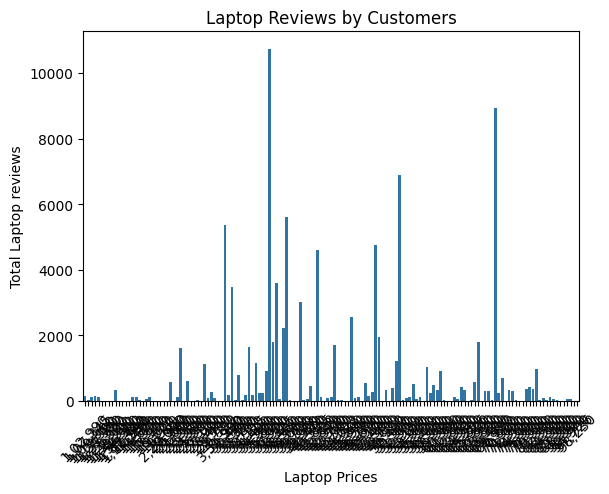

In [18]:

Total_reviews = df.groupby('laptop_prices')['laptop_reviews'].sum().reset_index()
sns.barplot(x='laptop_prices', y='laptop_reviews', data=Total_reviews)
plt.xlabel('Laptop Prices')
plt.ylabel('Total Laptop reviews')
plt.title('Laptop Reviews by Customers')
plt.xticks(rotation=45)   
plt.show()

In [19]:
# availability of laptop_names in particular price

df.groupby(['laptop_prices']).agg({'laptop_names':'count'})

,laptop_names
laptop_prices,
"1,02,990",4
"1,07,345",1
"1,09,990",2
"1,19,990",2
"1,24,990",2
...,...
"90,990",1
"90,999",2
"94,990",3


In [20]:
# availability of names in particular reviews

df.groupby(['laptop_reviews']).agg({'laptop_names':'count'})

,laptop_names
laptop_reviews,
0,36
1,17
2,8
3,13
4,11
...,...
1801,2
2088,2
2208,5


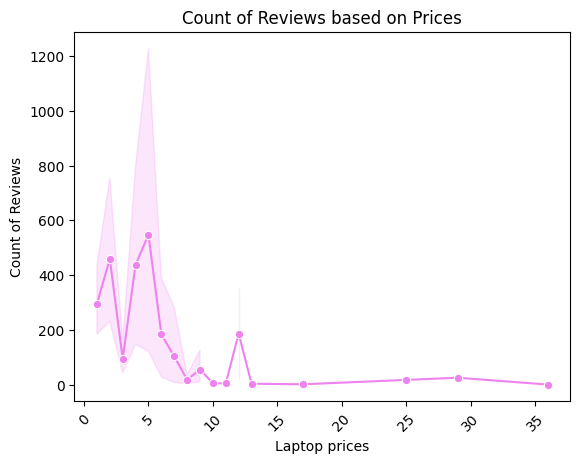

In [29]:
Over_all=df.groupby('laptop_reviews')['laptop_prices'].count().reset_index()
sns.lineplot(y='laptop_reviews',x='laptop_prices',data=Over_all,marker='o',color='violet')
plt.ylabel('Count of Reviews')
plt.xlabel('Laptop prices')
plt.title('Count of Reviews based on Prices')
plt.xticks(rotation=45)
plt.show()

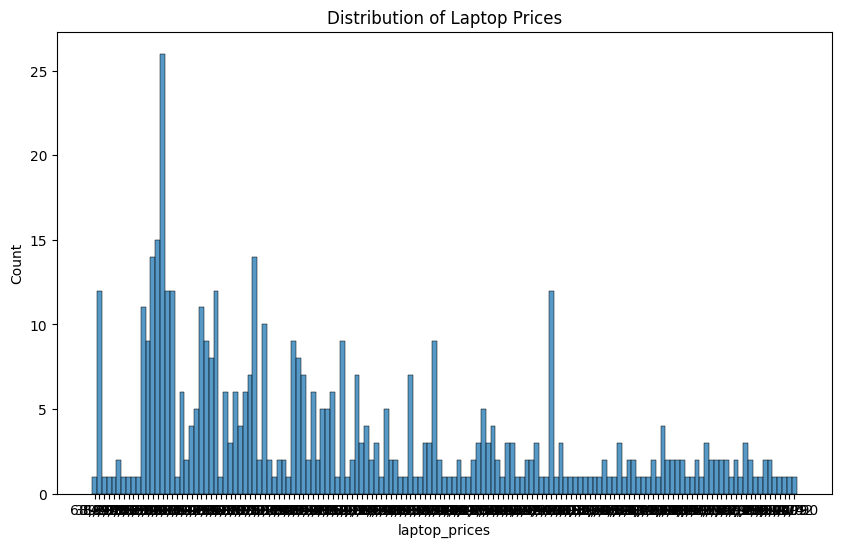

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['laptop_prices'], bins=20)
plt.title('Distribution of Laptop Prices')
plt.show()

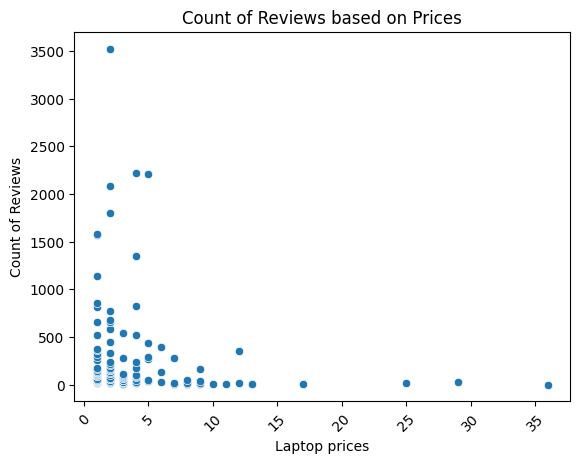

In [28]:
Over_all=df.groupby('laptop_reviews')['laptop_prices'].count().reset_index()
x=sns.scatterplot(y='laptop_reviews',x='laptop_prices',data=Over_all)
x.set_ylabel('Count of Reviews')
x.set_xlabel('Laptop prices')
x.set_title('Count of Reviews based on Prices')
x.set_xticklabels(x.get_xticklabels(),rotation=45)
plt.show()

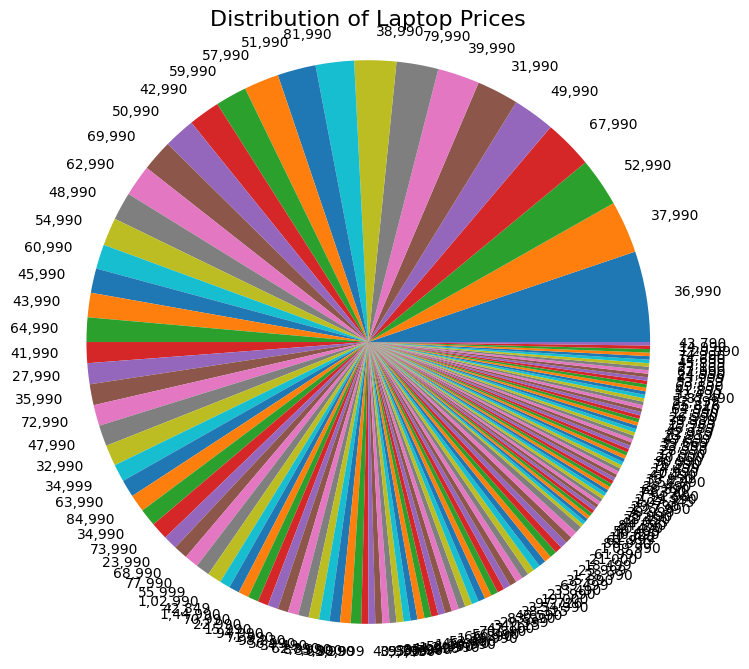

In [35]:
laptop = pd.DataFrame(df['laptop_prices'].value_counts().reset_index())
laptop.columns = ['laptop_prices', 'Count']
plt.figure(figsize=(8, 8))
plt.pie(laptop['Count'], labels=laptop['laptop_prices'])
plt.axis('equal')
plt.title("Distribution of Laptop Prices", fontsize=16)
plt.show()

In [ ]:
sns.heatmap(df.corr())

In [10]:
sales_clean = df.drop(columns=["laptop_prices","laptop_reviews"])

In [11]:
from sklearn.model_selection import train_test_split

X = df[['laptop_prices', 'laptop_reviews']]
y = df['laptop_names']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.preprocessing import StandardScaler
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
standardizer = StandardScaler()
X_train[numeric_columns] = standardizer.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = standardizer.transform(X_test[numeric_columns])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
categorical_columns = X_train.select_dtypes(include=['object']).columns
numeric_columns = X_train.select_dtypes(exclude=['object']).columns
encoder = OneHotEncoder(sparse=False, drop='first')
X_train_categorical = encoder.fit_transform(X_train[categorical_columns])
X_test_categorical = encoder.transform(X_test[categorical_columns])
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_columns])
X_test_numeric = scaler.transform(X_test[numeric_columns])
X_train_processed = np.concatenate((X_train_numeric, X_train_categorical), axis=1)
X_test_processed = np.concatenate((X_test_numeric, X_test_categorical), axis=1)
lm = LinearRegression()
lm.fit(X_train_processed, y_train)
y_test_pred = lm.predict(X_test_processed)
mse_lm = mean_squared_error(y_test, y_test_pred)
print("Linear Regression Model MSE: {}".format(mse_lm))
lin_rmse = np.sqrt(mse_lm)
print("Linear Regression Model RMSE: {}".format(lin_rmse))
lin_mae = mean_absolute_error(y_test, y_test_pred)
print("Linear Regression Model MAE: {}".format(lin_mae))

In [ ]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(estimator=lm, X=X_train_processed, y=y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)